# 📊 Regularization in Linear Models: Facebook Post Engagement Prediction

## Project Overview

In this project, we explore the importance of regularization techniques in linear models by predicting Facebook post interactions for a cosmetics brand. We compare three regression models:

- **Linear Regression** (no regularization)
- **Lasso Regression** (L1 regularization)
- **Ridge Regression** (L2 regularization)

The goal is to understand how regularization affects coefficient stability, model complexity, and overall performance—especially in the presence of multicollinearity among features.

## Objectives

- Preprocess and standardize the dataset using `StandardScaler`
- Train and evaluate Linear, Lasso, and Ridge regression models
- Analyze and visualize the impact of regularization on feature weights
- Compare model performance using R² score and Mean Squared Error (MSE)

🔎 Model Coefficients Comparison
                                              Feature       Linear  \
0                                    Page total likes    14.525554   
1                                            Category    -1.237528   
2                                          Post Month   -32.485266   
3                                        Post Weekday    -0.726876   
4                                           Post Hour    -2.275752   
5                                                Paid    -3.540207   
6                           Lifetime Post Total Reach   -24.695152   
7                     Lifetime Post Total Impressions    35.584018   
8                              Lifetime Engaged Users  1500.099929   
9                             Lifetime Post Consumers -1329.093671   
10                         Lifetime Post Consumptions     9.473169   
11  Lifetime Post Impressions by people who have l...   -16.175980   
12   Lifetime Post reach by people who like your Page   -2

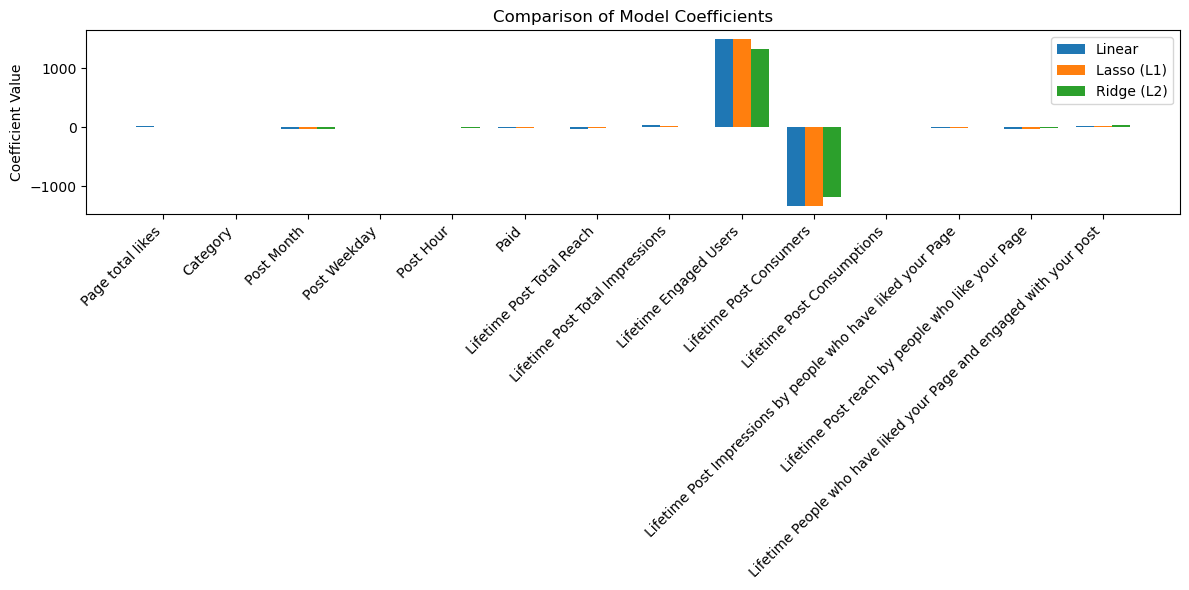

📈 Model Evaluation Metrics
               Model  R² Score          MSE
0  Linear Regression  0.925146  5306.875099
1         Lasso (L1)  0.925535  5279.258370
2         Ridge (L2)  0.942439  4080.818718


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 📂 Load the dataset
df = pd.read_csv('datasets/dataset_facebook_cosmetics_us.csv', sep=';')

# 🎯 Separate features and target
X = df.drop('Total Interactions', axis=1)
y = df['Total Interactions']

# ✂️ Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# ⚖️ Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🤖 Train models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

lr.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)

# 📌 Coefficients comparison
feature_names = X.columns
coef_lr = lr.coef_
coef_lasso = lasso.coef_
coef_ridge = ridge.coef_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear': coef_lr,
    'Lasso (L1)': coef_lasso,
    'Ridge (L2)': coef_ridge
})
print("🔎 Model Coefficients Comparison")
print(coef_df)

# 📊 Plot coefficient comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(feature_names))
width = 0.25
plt.bar(x - width, coef_lr, width, label='Linear')
plt.bar(x, coef_lasso, width, label='Lasso (L1)')
plt.bar(x + width, coef_ridge, width, label='Ridge (L2)')
plt.xticks(ticks=x, labels=feature_names, rotation=45, ha='right')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Model Coefficients')
plt.legend()
plt.tight_layout()
plt.show()

# 🧪 Evaluate models
y_pred_lr = lr.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)

metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso (L1)', 'Ridge (L2)'],
    'R² Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge)
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_ridge)
    ]
})
print("📈 Model Evaluation Metrics")
print(metrics)

## ✅ Conclusions

- **Linear Regression** performs well but is susceptible to multicollinearity, leading to potentially large and unstable coefficients.
- **Lasso Regression (L1)** reduces model complexity by shrinking some coefficients to zero, effectively performing feature selection. It's useful when many features are redundant or uninformative.
- **Ridge Regression (L2)** keeps all features but distributes the weights more evenly, which helps when features are correlated.

### 📈 Performance Summary

| Model              | R² Score | Mean Squared Error (MSE) |
|--------------------|----------|---------------------------|
| Linear Regression  | ~0.925   | ~5306.88                  |
| Lasso (L1)         | ~0.926   | ~5279.26                  |
| Ridge (L2)         | ~0.942   | ~4080.82                  |

- **Ridge Regression achieved the best performance** on the test set, with the highest R² and lowest MSE.
- Visual inspection of coefficient magnitudes confirmed that regularization stabilizes model interpretation by penalizing overly large weights.

📌 **Takeaway:** Regularization not only improves model performance but also makes the model more interpretable and robust—especially when working with highly correlated features.